# Logistic Regression from Scratch over Breast Cancer Data(Bi-Class Classification)
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). It is a Discriminate Learning Algorithm which means that it try to find posterior probability over classes directly without the envolvement of likelihood probabilities.<br>

In statistics, the logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead, True/False or healthy/sick. <br>

This can be extended to Classify several classes of events such as determining whether an image contains a cat, dog, lion, etc.<br>

This code contains only about how we can fit a logistic model over user given dataset and also to get a good output result out of it. The code written keeping vision of object oriented programing which means that the code is fully moduler so that to keep in mind about the use of the functions in other programs also.
<br>
# ----------------------------------------------------------------------------------------------------------
### Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

### Calling Data
Data is call for work. The Columns are selected here is according to the BREAST CANCER DATASET from WINCONSIN Hospital Easily find on Kaggle(www.kaggle.com).

In [24]:
data= pd.read_csv('Breast_Cancer_Data.csv')

Removing unnecessary columns from the dataset so that you won't face any trouble regarding the dataset. I use Breast Cancer Dataset to train model and predict whether the person is having cancer or not.<br>
Preprocessing the data before applying the Logistic Classifier

In [25]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [26]:
data['diagnosis'].replace(to_replace=['B','M'],value=[0,1],inplace=True)

In [27]:
data.drop(labels=['id','Unnamed: 32'],axis=1,inplace=True)

Spliting Independent and Dependent Variables

In [28]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [29]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

Splitting training and testing data

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

### Normalising the data
Scaling the features.<br>
The scaling is also know as standardisation/normalisation. Standardization is a process for making a dataset fit for the training of the model. In this prosess we make a dataset whose value lies between zero mean and one standard deviation. The Data Comming out from this process is smooth for the curves and fitting a model.

In [32]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

# ----------------------------------------------------------------------------------------------------------
## Logistic Regression Model
Creating a Logistic regression model object and fitting it over training data.<br>
The Model contain these three function for the fitting over the data.
### --------------------------------------------------------------------------------------------------------------------------------------
### Sigmoid Function
Defining the Sigmoid Function. Sigmoid function is use in the ml to get the probability value (i.e. between 0 to 1) for any feature. The function basically has the formula which make the value equal to probable value of the feature between 0 to 1.<br>
 
### Formula : 
$$s_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^-{( \theta^Tx + \theta 0)}}$$
### --------------------------------------------------------------------------------------------------------------------------------------
### Negative Log Loss Function
Defining Function for Negative Log Loss calculation.In Convex Optimization we find the global minima to train the model so it get less error while prediction for the testing and training data. This error is called  as loss. We introduce log and a negative sign in case to smoothing of and inverting the parabola to find the global minima.<br>
##### Here, Logrithm is use to smoothing out the curve so that it don't stucked in any local minima. 
##### Here, Negative sign is introduce to invert the parabola of the function.
### Formula : 
$$l_ \theta (C) = - \frac{C * H[\theta_ \mathrm{0},\theta_ \mathrm{1},...,\theta_ n] + (\mathrm{1} - C) * H[\theta_ \mathrm{0},\theta_ \mathrm{1},...,\theta_ n]}{Training Length}$$
### --------------------------------------------------------------------------------------------------------------------------------------
### Gradient Descent
The Fit function is to fit the learning curve and reduce the loss of the model. The algorithm use here is the Stocastic Gradient Descent(SGD). The algorithm is containing the learning rate,epsilon for the stoping of under going algorithm to find global minima.

In [33]:
logistic=LogisticRegression(verbose=1)

In [34]:
logistic.fit(xtrain,ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

# ----------------------------------------------------------------------------------------------------------
### Prediction Function
Prediction function is use to predict the accuracy of the classifier model over the train data and test data.

In [35]:
def prediction(model,testing_data,testing_label):
    predict = model.predict(testing_data)
    accuracy = np.count_nonzero(np.equal(predict,testing_label))
    print("Accuracy : ",accuracy*100/testing_label.shape[0])
    return accuracy,predict

#### Testing our Model on the Training Data

In [36]:
train_accuracy,train_predict = prediction(logistic,xtrain,ytrain)

Accuracy :  98.99497487437186


#### Testing our Model on the Testing Data

In [37]:
test_accuracy,test_predict = prediction(logistic,xtest,ytest)

Accuracy :  97.6608187134503


# ----------------------------------------------------------------------------------------------------------
### Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.<br>
##### Precision means how much accurately our model predicts or we can say how much positive idenfied label actually correct.<br>
$$Precision = \frac{True Positive}{True Positive + False Positive}$$
##### Recall means how much positive identified label predicted correctly.<br>
$$Recall = \frac{True Positive}{True Positive + False Negative}$$

In [38]:
def confusion_matrix_with_plot(model,testing_data,testing_label,predict_label):
    tn,fp,fn,tp = confusion_matrix(testing_label,predict_label).ravel()
    plot_confusion_matrix(logistic,testing_data,testing_label)
    precision = tp/(tp+fp)*100
    recall = tp/(tp+fn)*100
    return print("True Positive : ",tp,"\nFalse Positive : ",fp,"\nTrue Negative : ",tn,"\nFalse Negative : ",fn,"\nPrecision : ",precision,"\nRecall : ",recall)

#### Confusion Matrix over training data

True Positive :  141 
False Positive :  0 
True Negative :  253 
False Negative :  4 
Precision :  100.0 
Recall :  97.24137931034483


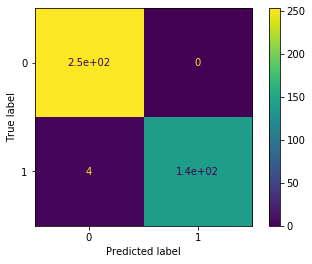

In [39]:
confusion_matrix_with_plot(logistic,xtrain,ytrain,train_predict)

#### Confusion Matrix over testing data

True Positive :  64 
False Positive :  1 
True Negative :  103 
False Negative :  3 
Precision :  98.46153846153847 
Recall :  95.52238805970148


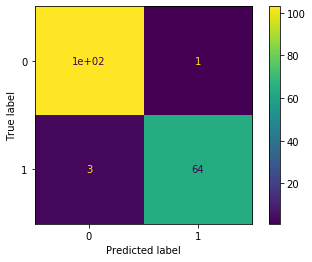

In [40]:
confusion_matrix_with_plot(logistic,xtest,ytest,test_predict)

# ----------------------------------------------------------------------------------------------------------
### Precision-Recall Curve
The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

#### Precision-Recall Curve over training data

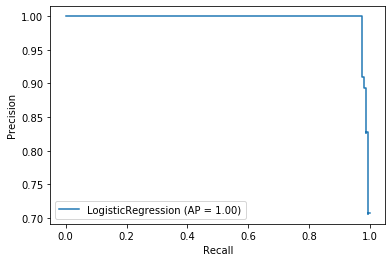

In [41]:
plot_precision_recall_curve(logistic,xtrain,ytrain)

#### Precision-Recall Curve over testing data

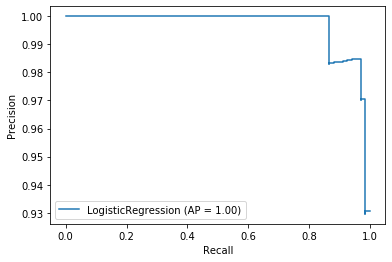

In [42]:
plot_precision_recall_curve(logistic,xtest,ytest)

### Plot ROC Curve Function
Preparing to plot ROC curve. The function plot the ROC Curve from the list containing the value of true positive and false positive rate. A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate against the false positive rate at various threshold settings.

#### Plotting ROC Curve for Training Data

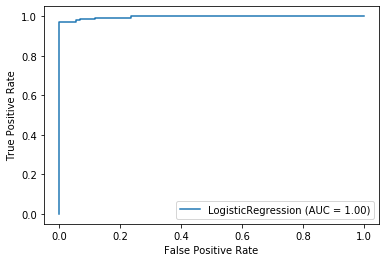

In [43]:
plot_roc_curve(logistic,xtrain,ytrain)

#### Plotting ROC Curve Testing Data

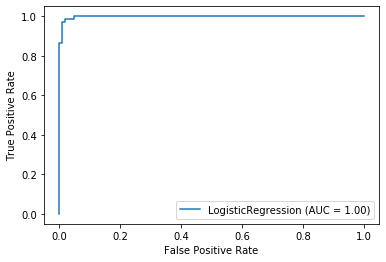

In [44]:
plot_roc_curve(logistic,xtest,ytest)